In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
# %matplotlib inline
%matplotlib 
#inline

import os
# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt
root = r'C:\Users\Aulamultimedia\MEGA\Especializacion en Inteligencia Artificial UBA\Materias\Bimestre 2\Vision por Computadora 1\vision_computadora_I\Material_TPs\TP4'

Using matplotlib backend: <object object at 0x00000180DC1F8EA0>


In [2]:
# implementamos una función para Descriptor: Asignamos un número del 1 al 8 para cada píxel vecino y luego calculamos el valor
# binario del vector y se lo asignamos al píxel en cuestión.
def LBP(imagen):
    # se reducen las dimensiones para no tomar los píxeles de los bordes
    ancho = imagen.shape[0]
    alto= imagen.shape[1]
    img = np.copy(imagen[1:ancho-1, 1:alto-1])
    boo = np.array([128,64,32,16,8,4,2,1])
    print(imagen.shape)
    vector = np.zeros(8, dtype = 'uint8')
    for i in range(1, ancho-2):
        for j in range(1, alto-2):
            vector = np.array([imagen[i, j-1]>=imagen[i,j], imagen[i+1, j-1]>=imagen[i,j],imagen[i+1, j]>=imagen[i,j],imagen[i+1, j+1]>=imagen[i,j],imagen[i, j+1]>=imagen[i,j],imagen[i-1, j+1]>=imagen[i,j], imagen[i-1, j]>=imagen[i,j],imagen[i-1, j-1]>=imagen[i,j]])
            valor = np.sum(np.multiply(vector, boo))
            img[i, j]= valor
    #print(np.array([imagen[0,0]>=imagen[1,1], imagen[0, 1]>=imagen[1,1],imagen[0, 2]>=imagen[1,1],imagen[1, 0]>=imagen[1,1],imagen[1,2]>=imagen[1,1],imagen[2, 0]>=imagen[1,1], imagen[2, 1]>=imagen[1,1],imagen[2, 2]>=imagen[1,1]]))
    #print(np.array([imagen[0,0], imagen[0, 1],imagen[0, 2],imagen[1, 0],imagen[1,2],imagen[2, 0], imagen[2, 1],imagen[2, 2]]))
    #print(imagen[1,1])
    return img


# Función para Histograma (entre 0 y 256)

In [3]:
# Implemento el la función histograma
def hist(img):
    h = np.zeros(256)
    for i in range(1,255):
        h[i] = np.count_nonzero(img == i)
    return h

In [4]:
# cargamos las imagenes
var_names = ["img1", "img2", "img3", "img4", "img5"]
for ix, name in enumerate(var_names):
    file = 'Imagen'+str(ix+1)+'.png'
    img = cv.imread(os.path.join(root,file))
    globals()[name] = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    #cv.imshow('img',globals()[name])
    #cv.waitKey(0)
    #cv.destroyAllWindows()
    print('forma de la imagen {}:{}'.format((ix+1, ), globals()[name].shape))

forma de la imagen (1,):(189, 190)
forma de la imagen (2,):(188, 188)
forma de la imagen (3,):(189, 196)
forma de la imagen (4,):(189, 188)
forma de la imagen (5,):(190, 191)


(189, 190)
(188, 188)
(189, 196)
(189, 188)
(190, 191)


<BarContainer object of 256 artists>

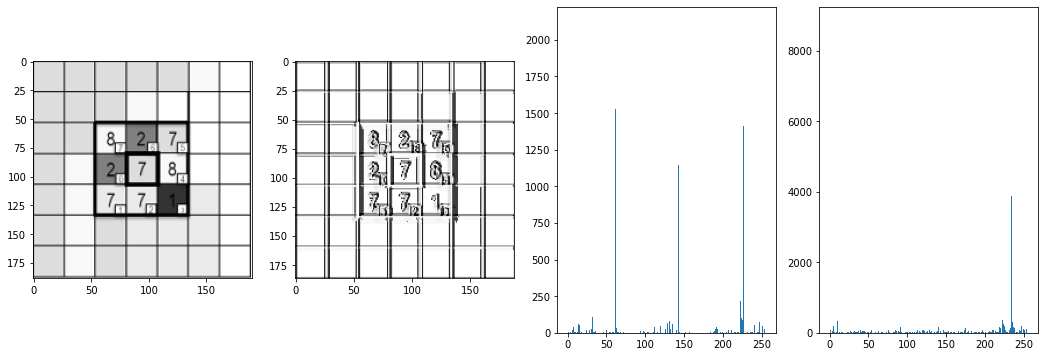

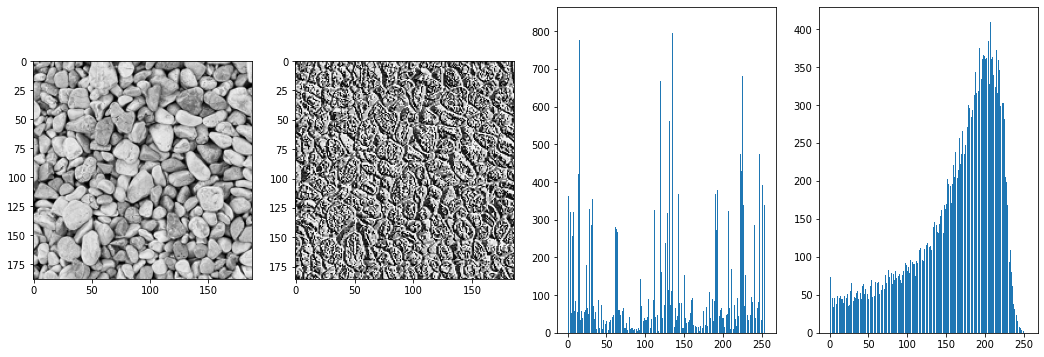

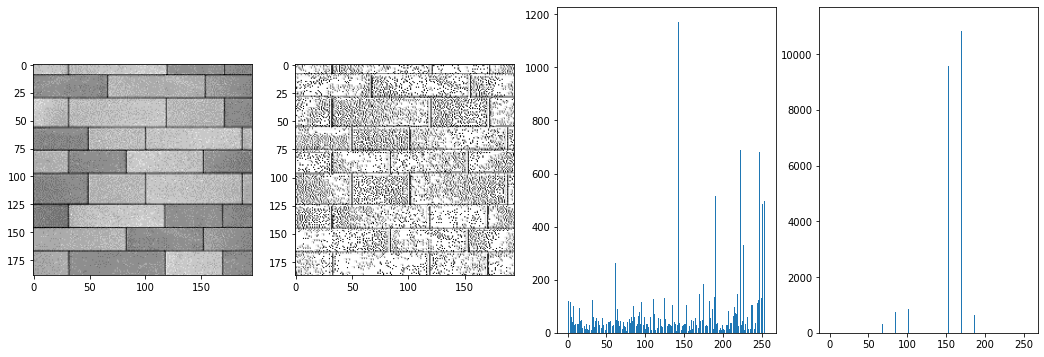

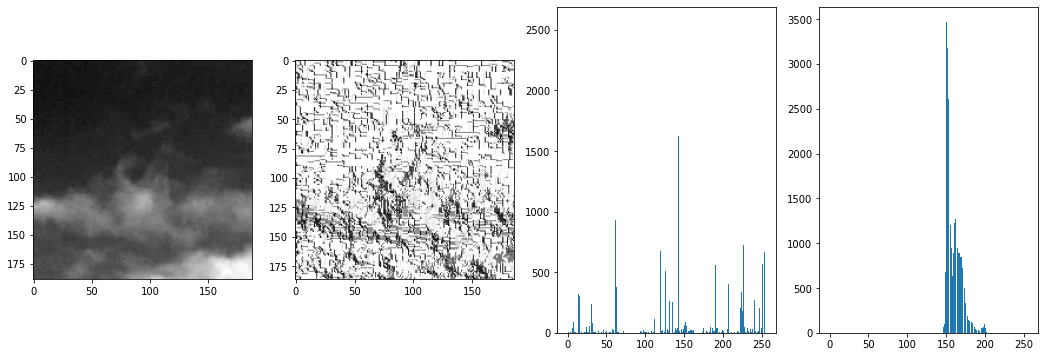

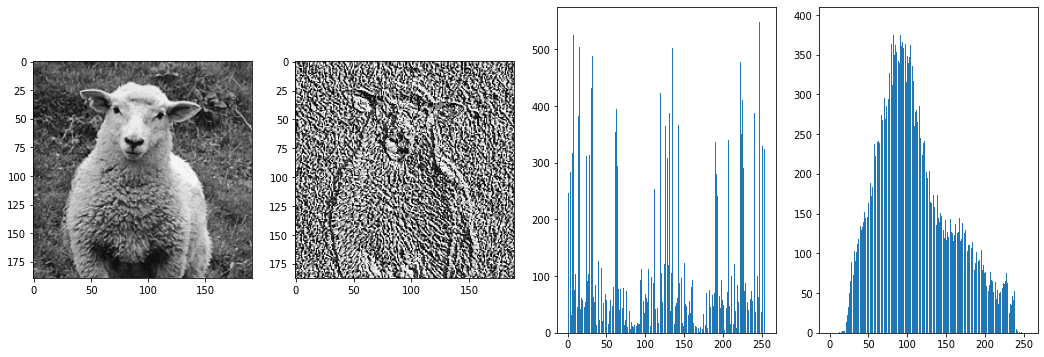

In [5]:
%matplotlib inline
fig, axs = plt.subplots(1, 4, figsize=(18, 6))
axs[0].imshow(img1, cmap='gray')
imgg1 = LBP(img1)
axs[1].imshow(imgg1, cmap='gray')
axs[2].bar(np.arange(0,256),hist(imgg1))
axs[3].bar(np.arange(0,256),hist(img1))

fig, axs = plt.subplots(1, 4, figsize=(18, 6))
axs[0].imshow(img2, cmap='gray')
imgg2 = LBP(img2)
axs[1].imshow(imgg2, cmap='gray')
axs[2].bar(np.arange(0,256),hist(imgg2))
axs[3].bar(np.arange(0,256),hist(img2))

fig, axs = plt.subplots(1, 4, figsize=(18, 6))
axs[0].imshow(img3, cmap='gray')
imgg3 = LBP(img3)
axs[1].imshow(imgg3, cmap='gray')
axs[2].bar(np.arange(0,256),hist(imgg3))
axs[3].bar(np.arange(0,256),hist(img3))

fig, axs = plt.subplots(1, 4, figsize=(18, 6))
axs[0].imshow(img4, cmap='gray')
imgg4 = LBP(img4)
axs[1].imshow(imgg4, cmap='gray')
axs[2].bar(np.arange(0,256),hist(imgg4))
axs[3].bar(np.arange(0,256),hist(img4))

fig, axs = plt.subplots(1, 4, figsize=(18, 6))
axs[0].imshow(img5, cmap='gray')
imgg5 = LBP(img5)
axs[1].imshow(imgg5, cmap='gray')
axs[2].bar(np.arange(0,256),hist(imgg5))
axs[3].bar(np.arange(0,256),hist(img5))



In [ ]:
# Conslusiones de los histogramas:
# Se observa que los histogramas realizados sobre la transformación están mejor distribuidos en todo el rango (0-255), por lo cual
# podemos inferir que nos brinda mayor cantidad de información .
# Por otro lado, se puede observar la periodicidad de los patrones dentro de los histogramas de las imagenes transformadas. Posiblmente
# tomando un solo ciclo podamos caracterizar a la imagen, simplificando el procesamiento.
# También observamos la dificultad del algoritmo en imagenes con poca variabilidad de colores, como la imagen nro 1.